In [2]:
import random
import numpy as np
import math
import matplotlib.pyplot as plt

resultado_clientes_na_fila = []
resultado_tempo_de_espera = []

def simulador1(repeticoes,lamb,mi):
    #Quantidade de clientes na fila
    clientes_na_fila = 0
    #tempo de simulaçao mantido a cada iteração
    tempo_de_simulacao = 0
    #quantidade media de pessoas na fila
    media_clientes_na_fila = 0
    #tempo medio que um cliente leva para ser atendido
    tempo_medio_espera = 0
    #lista de tempos para calculo do tempo medio
    lista_tempos = []
    #clientes atendidos, para uso no calculo do tempo medio
    clientes_atendidos = 0
    #lista com todos os valores da fila 
    lista_clientes_na_fila = []
    lista_clientes_na_fila.append(clientes_na_fila)
    #lista de tempos de espera
    lista_tempos_de_espera = []
    for i in range(repeticoes):
        #gera as amostras
        amostra_chegada = random.expovariate(lamb)
        amostra_saida = random.expovariate(mi)
        #Se não tem clientes na fila, sempre será tomada a amostra de chegada
        if clientes_na_fila == 0:
            media_clientes_na_fila += clientes_na_fila*amostra_chegada
            tempo_de_simulacao += amostra_chegada
            clientes_na_fila += 1
            lista_clientes_na_fila.append(clientes_na_fila)
            lista_tempos.append(tempo_de_simulacao)
            print(str(tempo_de_simulacao) + ": chegada de cliente, total de clientes na fila é " + str(clientes_na_fila))
        #Se a amostra de chegada foi mais rápida, ocorre uma chegada
        elif amostra_chegada < amostra_saida:
            media_clientes_na_fila += clientes_na_fila*amostra_chegada
            tempo_de_simulacao += amostra_chegada
            clientes_na_fila += 1
            lista_clientes_na_fila.append(clientes_na_fila)
            lista_tempos.append(tempo_de_simulacao)
            print(str(tempo_de_simulacao) + ": chegada de cliente, total de clientes na fila é " + str(clientes_na_fila))
        #Se a amostra de saida foi mais rápida, ocorre uma saida
        else:
            media_clientes_na_fila += clientes_na_fila*amostra_saida
            tempo_de_simulacao += amostra_saida
            clientes_na_fila -= 1
            lista_clientes_na_fila.append(clientes_na_fila)
            clientes_atendidos += 1
            lista_tempos_de_espera.append(tempo_de_simulacao - lista_tempos[0])
            tempo_medio_espera += tempo_de_simulacao - lista_tempos.pop(0)
            print(str(tempo_de_simulacao) + ": saida de cliente, total de clientes na fila é " + str(clientes_na_fila))
    avgfila = media_clientes_na_fila/tempo_de_simulacao
    avgtempo = tempo_medio_espera/clientes_atendidos
    sumdpfila = 0
    sumdptempo = 0
    l_freq_fila = [0]*20
    l_freq_tempo = [0]*5
    for x in lista_clientes_na_fila:
      sumdpfila += (x - avgfila)**2
      if x >= 20:
        l_freq_fila[19] += 1
      else:
        l_freq_fila[x] += 1  
    for y in lista_tempos_de_espera:
      sumdptempo += (y - avgtempo)**2
      if y < 2*1/mi:
        l_freq_tempo[0]+=1
      elif y < 3*1/mi:
        l_freq_tempo[1]+=1 
      elif y < 4*1/mi:
        l_freq_tempo[2]+=1    
      elif y < 5*1/mi:
        l_freq_tempo[3]+=1 
      else:
        l_freq_tempo[4]+=1     
    dpfila = math.sqrt(sumdpfila/len(lista_clientes_na_fila))
    CIupFila = avgfila + 1.96 * dpfila/math.sqrt(repeticoes)
    CIlowFila = avgfila - 1.96 * dpfila/math.sqrt(repeticoes)
    dptempo = math.sqrt(sumdptempo/len(lista_tempos_de_espera)) 
    CIupTempo = avgtempo + 1.96 * dptempo/math.sqrt(repeticoes)
    CIlowTempo = avgtempo - 1.96 * dptempo/math.sqrt(repeticoes)
    if CIlowFila < 0:
      CIlowFila = 0 
    if CIlowTempo < 0:
      CIlowTempo = 0  
    print("\nMedia de clientes na fila: " + str(media_clientes_na_fila/tempo_de_simulacao))
    print("\nTempo medio de espera: " + str(tempo_medio_espera/clientes_atendidos))
    print("\nIntervalo de confiança de 95% para média de pessoas na fila: " + str(CIlowFila) + " < Média < " + str(CIupFila))
    print("\nIntervalo de confiança de 95% para média de tempo de espera: " + str(CIlowTempo) + " < Média < " + str(CIupTempo)+ "\n")
    plt.bar(np.arange(len(l_freq_fila)),l_freq_fila)
    plt.xlabel('Tamanho da fila')
    plt.ylabel('Frequência')
    plt.title('Frequência de tamanho da fila')
    plt.show()
    print("\n")
    label_intervalos = ["< 2 mi","< 3 mi","< 4 mi","< 5 mi","< 6 mi",]
    plt.bar(label_intervalos,l_freq_tempo)
    plt.xlabel('Intervalo de espera')
    plt.ylabel('Frequência')
    plt.title('Frequência de tempo de espera')
    plt.show()
    return

def simulador2(repeticoes, lamb, mi):
    #Quantidade de clientes na fila
    clientes_na_fila = 0
    #tempo de simulaçao mantido a cada iteração
    tempo_de_simulacao = 0
    #lista de eventos, iniciada com uma chegada.
    lista_de_eventos = [[random.expovariate(lamb),"Chegada"]]
    #quantidade media de pessoas na fila
    media_clientes_na_fila = 0
    #tempo medio que um cliente leva para ser atendido
    tempo_medio_espera = 0
    #lista de tempos para calculo do tempo medio
    lista_tempos = []
    #clientes atendidos, para uso no calculo do tempo medio
    clientes_atendidos = 0
    #lista com todos os valores da fila
    lista_clientes_na_fila = []
    lista_clientes_na_fila.append(clientes_na_fila)
    #lista de tempos de espera
    lista_tempos_de_espera = []
    for i in range(repeticoes):
        #atualizando o tempo de simulação e calculando o tempo até a proxima chegada e/ou saida. Na maioria das vezes um desses será descartado.
        media_clientes_na_fila += clientes_na_fila*(lista_de_eventos[0][0] - tempo_de_simulacao)
        tempo_de_simulacao = lista_de_eventos[0][0]
        prox_chegada = random.expovariate(lamb) + tempo_de_simulacao
        prox_saida = random.expovariate(mi) + tempo_de_simulacao
        #Se o evento atual é uma chegada, trata o evento e adiciona o próximo evento de chegada na lista de eventos. Se o evento leva de 0 -> 1 cliente na fila, também adiciona o evento de saida para esse cliente.
        if lista_de_eventos[0][1] == "Chegada":
            clientes_na_fila += 1
            lista_clientes_na_fila.append(clientes_na_fila)
            lista_tempos.append(tempo_de_simulacao)
            print(str(tempo_de_simulacao) + ": chegada de cliente, total de clientes na fila é " + str(clientes_na_fila))
            if clientes_na_fila == 1:
                lista_de_eventos.append([prox_chegada,"Chegada"])
                lista_de_eventos.append([prox_saida,"Saida"])
            else:
                lista_de_eventos.append([prox_chegada,"Chegada"])
        #Se o evento atual é uma saida, trata o evento e adiciona o próximo evento de saída, exceto se não há nenhum cliente na fila após a saida.
        elif lista_de_eventos[0][1] == "Saida":
            clientes_na_fila -= 1
            lista_clientes_na_fila.append(clientes_na_fila)
            lista_tempos_de_espera.append(tempo_de_simulacao - lista_tempos[0])
            tempo_medio_espera += tempo_de_simulacao - lista_tempos.pop(0)
            clientes_atendidos += 1
            print(str(tempo_de_simulacao) + ": saida de cliente, total de clientes na fila é " + str(clientes_na_fila))
            if clientes_na_fila != 0:
                lista_de_eventos.append([prox_saida,"Saida"])
        #Remove o evento tratado da lista de eventos e organiza ela em termos de tempo.
        lista_de_eventos.pop(0)
        lista_de_eventos.sort()
    avgfila = media_clientes_na_fila/tempo_de_simulacao
    avgtempo = tempo_medio_espera/clientes_atendidos
    sumdpfila = 0
    sumdptempo = 0
    l_freq_fila = [0]*20
    l_freq_tempo = [0]*5
    for x in lista_clientes_na_fila:
      sumdpfila += (x - avgfila)**2
      if x >= 20:
        l_freq_fila[19] += 1
      else:
        l_freq_fila[x] += 1  
    for y in lista_tempos_de_espera:
      sumdptempo += (y - avgtempo)**2
      if y < 2*1/mi:
        l_freq_tempo[0]+=1
      elif y < 3*1/mi:
        l_freq_tempo[1]+=1 
      elif y < 4*1/mi:
        l_freq_tempo[2]+=1    
      elif y < 5*1/mi:
        l_freq_tempo[3]+=1 
      else:
        l_freq_tempo[4]+=1     
    dpfila = math.sqrt(sumdpfila/len(lista_clientes_na_fila))
    CIupFila = avgfila + 1.96 * dpfila/math.sqrt(repeticoes)
    CIlowFila = avgfila - 1.96 * dpfila/math.sqrt(repeticoes)
    dptempo = math.sqrt(sumdptempo/len(lista_tempos_de_espera)) 
    CIupTempo = avgtempo + 1.96 * dptempo/math.sqrt(repeticoes)
    CIlowTempo = avgtempo - 1.96 * dptempo/math.sqrt(repeticoes)
    if CIlowFila < 0:
      CIlowFila = 0 
    if CIlowTempo < 0:
      CIlowTempo = 0  
    print("\nMedia de clientes na fila: " + str(media_clientes_na_fila/tempo_de_simulacao))
    print("\nTempo medio de espera: " + str(tempo_medio_espera/clientes_atendidos))
    print("\nIntervalo de confiança de 95% para média de pessoas na fila: " + str(CIlowFila) + " < Média < " + str(CIupFila))
    print("\nIntervalo de confiança de 95% para média de tempo de espera: " + str(CIlowTempo) + " < Média < " + str(CIupTempo)+ "\n")
    plt.bar(np.arange(len(l_freq_fila)),l_freq_fila)
    plt.xlabel('Tamanho da fila')
    plt.ylabel('Frequência')
    plt.title('Frequência de tamanho da fila')
    plt.show()
    print("\n")
    label_intervalos = ["< 2 mi","< 3 mi","< 4 mi","< 5 mi","< 6 mi",]
    plt.bar(label_intervalos,l_freq_tempo)
    plt.xlabel('Intervalo de espera')
    plt.ylabel('Frequência')
    plt.title('Frequência de tempo de espera')
    plt.show()
    return

def detsimulador1(repeticoes,lamb,mi):
    #Quantidade de clientes na fila
    clientes_na_fila = 0
    #tempo de simulaçao mantido a cada iteração
    tempo_de_simulacao = 0
    #quantidade media de pessoas na fila
    media_clientes_na_fila = 0
    #tempo medio que um cliente leva para ser atendido
    tempo_medio_espera = 0
    #lista de tempos para calculo do tempo medio
    lista_tempos = []
    #clientes atendidos, para uso no calculo do tempo medio
    clientes_atendidos = 0
    #lista com todos os valores da fila 
    lista_clientes_na_fila = []
    lista_clientes_na_fila.append(clientes_na_fila)
    #lista de tempos de espera
    lista_tempos_de_espera = []
    for i in range(repeticoes):
        #gera as amostras
        amostra_chegada = random.expovariate(lamb)
        amostra_saida = 1/mi
        #Se não tem clientes na fila, sempre será tomada a amostra de chegada
        if clientes_na_fila == 0:
            media_clientes_na_fila += clientes_na_fila*amostra_chegada
            tempo_de_simulacao += amostra_chegada
            clientes_na_fila += 1
            lista_clientes_na_fila.append(clientes_na_fila)
            lista_tempos.append(tempo_de_simulacao)
            print(str(tempo_de_simulacao) + ": chegada de cliente, total de clientes na fila é " + str(clientes_na_fila))
        #Se a amostra de chegada foi mais rápida, ocorre uma chegada
        elif amostra_chegada < amostra_saida:
            media_clientes_na_fila += clientes_na_fila*amostra_chegada
            tempo_de_simulacao += amostra_chegada
            clientes_na_fila += 1
            lista_clientes_na_fila.append(clientes_na_fila)
            lista_tempos.append(tempo_de_simulacao)
            print(str(tempo_de_simulacao) + ": chegada de cliente, total de clientes na fila é " + str(clientes_na_fila))
        #Se a amostra de saida foi mais rápida, ocorre uma saida
        else:
            media_clientes_na_fila += clientes_na_fila*amostra_saida
            tempo_de_simulacao += amostra_saida
            clientes_na_fila -= 1
            lista_clientes_na_fila.append(clientes_na_fila)
            clientes_atendidos += 1
            lista_tempos_de_espera.append(tempo_de_simulacao - lista_tempos[0])
            tempo_medio_espera += tempo_de_simulacao - lista_tempos.pop(0)
            print(str(tempo_de_simulacao) + ": saida de cliente, total de clientes na fila é " + str(clientes_na_fila))
    avgfila = media_clientes_na_fila/tempo_de_simulacao
    avgtempo = tempo_medio_espera/clientes_atendidos
    sumdpfila = 0
    sumdptempo = 0
    l_freq_fila = [0]*20
    l_freq_tempo = [0]*5
    for x in lista_clientes_na_fila:
      sumdpfila += (x - avgfila)**2
      if x >= 20:
        l_freq_fila[19] += 1
      else:
        l_freq_fila[x] += 1  
    for y in lista_tempos_de_espera:
      sumdptempo += (y - avgtempo)**2
      if y < 2*1/mi:
        l_freq_tempo[0]+=1
      elif y < 3*1/mi:
        l_freq_tempo[1]+=1 
      elif y < 4*1/mi:
        l_freq_tempo[2]+=1    
      elif y < 5*1/mi:
        l_freq_tempo[3]+=1 
      else:
        l_freq_tempo[4]+=1    
    dpfila = math.sqrt(sumdpfila/len(lista_clientes_na_fila))
    CIupFila = avgfila + 1.96 * dpfila/math.sqrt(repeticoes)
    CIlowFila = avgfila - 1.96 * dpfila/math.sqrt(repeticoes)
    dptempo = math.sqrt(sumdptempo/len(lista_tempos_de_espera)) 
    CIupTempo = avgtempo + 1.96 * dptempo/math.sqrt(repeticoes)
    CIlowTempo = avgtempo - 1.96 * dptempo/math.sqrt(repeticoes)
    if CIlowFila < 0:
      CIlowFila = 0 
    if CIlowTempo < 0:
      CIlowTempo = 0  
    print("\nMedia de clientes na fila: " + str(media_clientes_na_fila/tempo_de_simulacao))
    print("\nTempo medio de espera: " + str(tempo_medio_espera/clientes_atendidos))
    print("\nIntervalo de confiança de 95% para média de pessoas na fila: " + str(CIlowFila) + " < Média < " + str(CIupFila))
    print("\nIntervalo de confiança de 95% para média de tempo de espera: " + str(CIlowTempo) + " < Média < " + str(CIupTempo)+ "\n")
    plt.bar(np.arange(len(l_freq_fila)),l_freq_fila)
    plt.xlabel('Tamanho da fila')
    plt.ylabel('Frequência')
    plt.title('Frequência de tamanho da fila')
    plt.show()
    print("\n")
    label_intervalos = ["< 2 mi","< 3 mi","< 4 mi","< 5 mi","< 6 mi",]
    plt.bar(label_intervalos,l_freq_tempo)
    plt.xlabel('Intervalo de espera')
    plt.ylabel('Frequência')
    plt.title('Frequência de tempo de espera')
    plt.show()
    return

def detsimulador2(repeticoes, lamb, mi):
    #Quantidade de clientes na fila
    clientes_na_fila = 0
    #tempo de simulaçao mantido a cada iteração
    tempo_de_simulacao = 0
    #lista de eventos, iniciada com uma chegada.
    lista_de_eventos = [[random.expovariate(lamb),"Chegada"]]
    #quantidade media de pessoas na fila
    media_clientes_na_fila = 0
    #tempo medio que um cliente leva para ser atendido
    tempo_medio_espera = 0
    #lista de tempos para calculo do tempo medio
    lista_tempos = []
    #clientes atendidos, para uso no calculo do tempo medio
    clientes_atendidos = 0
    #lista com todos os valores da fila
    lista_clientes_na_fila = []
    lista_clientes_na_fila.append(clientes_na_fila)
    #lista de tempos de espera
    lista_tempos_de_espera = []
    for i in range(repeticoes):
        #atualizando o tempo de simulação e calculando o tempo até a proxima chegada e/ou saida. Na maioria das vezes um desses será descartado.
        media_clientes_na_fila += clientes_na_fila*(lista_de_eventos[0][0] - tempo_de_simulacao)
        tempo_de_simulacao = lista_de_eventos[0][0]
        prox_chegada = random.expovariate(lamb) + tempo_de_simulacao
        prox_saida = 1/mi + tempo_de_simulacao
        #Se o evento atual é uma chegada, trata o evento e adiciona o próximo evento de chegada na lista de eventos. Se o evento leva de 0 -> 1 cliente na fila, também adiciona o evento de saida para esse cliente.
        if lista_de_eventos[0][1] == "Chegada":
            clientes_na_fila += 1
            lista_clientes_na_fila.append(clientes_na_fila)
            lista_tempos.append(tempo_de_simulacao)
            print(str(tempo_de_simulacao) + ": chegada de cliente, total de clientes na fila é " + str(clientes_na_fila))
            if clientes_na_fila == 1:
                lista_de_eventos.append([prox_chegada,"Chegada"])
                lista_de_eventos.append([prox_saida,"Saida"])
            else:
                lista_de_eventos.append([prox_chegada,"Chegada"])
        #Se o evento atual é uma saida, trata o evento e adiciona o próximo evento de saída, exceto se não há nenhum cliente na fila após a saida.
        elif lista_de_eventos[0][1] == "Saida":
            clientes_na_fila -= 1
            lista_clientes_na_fila.append(clientes_na_fila)
            lista_tempos_de_espera.append(tempo_de_simulacao - lista_tempos[0])
            tempo_medio_espera += tempo_de_simulacao - lista_tempos.pop(0)
            clientes_atendidos += 1
            print(str(tempo_de_simulacao) + ": saida de cliente, total de clientes na fila é " + str(clientes_na_fila))
            if clientes_na_fila != 0:
                lista_de_eventos.append([prox_saida,"Saida"])
        #Remove o evento tratado da lista de eventos e organiza ela em termos de tempo.
        lista_de_eventos.pop(0)
        lista_de_eventos.sort()
    avgfila = media_clientes_na_fila/tempo_de_simulacao
    avgtempo = tempo_medio_espera/clientes_atendidos
    sumdpfila = 0
    sumdptempo = 0
    l_freq_fila = [0]*20
    l_freq_tempo = [0]*5
    for x in lista_clientes_na_fila:
      sumdpfila += (x - avgfila)**2
      if x >= 20:
        l_freq_fila[19] += 1
      else:
        l_freq_fila[x] += 1  
    for y in lista_tempos_de_espera:
      sumdptempo += (y - avgtempo)**2
      if y < 2*1/mi:
        l_freq_tempo[0]+=1
      elif y < 3*1/mi:
        l_freq_tempo[1]+=1 
      elif y < 4*1/mi:
        l_freq_tempo[2]+=1    
      elif y < 5*1/mi:
        l_freq_tempo[3]+=1 
      else:
        l_freq_tempo[4]+=1     
    dpfila = math.sqrt(sumdpfila/len(lista_clientes_na_fila))
    CIupFila = avgfila + 1.96 * dpfila/math.sqrt(repeticoes)
    CIlowFila = avgfila - 1.96 * dpfila/math.sqrt(repeticoes)
    dptempo = math.sqrt(sumdptempo/len(lista_tempos_de_espera)) 
    CIupTempo = avgtempo + 1.96 * dptempo/math.sqrt(repeticoes)
    CIlowTempo = avgtempo - 1.96 * dptempo/math.sqrt(repeticoes)
    if CIlowFila < 0:
      CIlowFila = 0 
    if CIlowTempo < 0:
      CIlowTempo = 0  
    print("\nMedia de clientes na fila: " + str(media_clientes_na_fila/tempo_de_simulacao))
    print("\nTempo medio de espera: " + str(tempo_medio_espera/clientes_atendidos))
    print("\nIntervalo de confiança de 95% para média de pessoas na fila: " + str(CIlowFila) + " < Média < " + str(CIupFila))
    print("\nIntervalo de confiança de 95% para média de tempo de espera: " + str(CIlowTempo) + " < Média < " + str(CIupTempo)+ "\n")
    plt.bar(np.arange(len(l_freq_fila)),l_freq_fila)
    plt.xlabel('Tamanho da fila')
    plt.ylabel('Frequência')
    plt.title('Frequência de tamanho da fila')
    plt.show()
    print("\n")
    label_intervalos = ["< 2 mi","< 3 mi","< 4 mi","< 5 mi","< 6 mi",]
    plt.bar(label_intervalos,l_freq_tempo)
    plt.xlabel('Intervalo de espera')
    plt.ylabel('Frequência')
    plt.title('Frequência de tempo de espera')
    plt.show()
    return

0.15367079427171243: chegada de cliente, total de clientes na fila é 1
0.32894423191444494: saida de cliente, total de clientes na fila é 0
0.40774718910690044: chegada de cliente, total de clientes na fila é 1
0.4278606352932688: saida de cliente, total de clientes na fila é 0
4.560116760402756: chegada de cliente, total de clientes na fila é 1
4.701316915646056: saida de cliente, total de clientes na fila é 0
5.153158376468062: chegada de cliente, total de clientes na fila é 1
5.895664673690906: saida de cliente, total de clientes na fila é 0
6.5488415563725395: chegada de cliente, total de clientes na fila é 1
7.017816142744625: saida de cliente, total de clientes na fila é 0
7.405341307835163: chegada de cliente, total de clientes na fila é 1
7.424447736279846: saida de cliente, total de clientes na fila é 0
7.673798057199174: chegada de cliente, total de clientes na fila é 1
7.712467715695163: chegada de cliente, total de clientes na fila é 2
7.895576976421102: chegada de cliente,

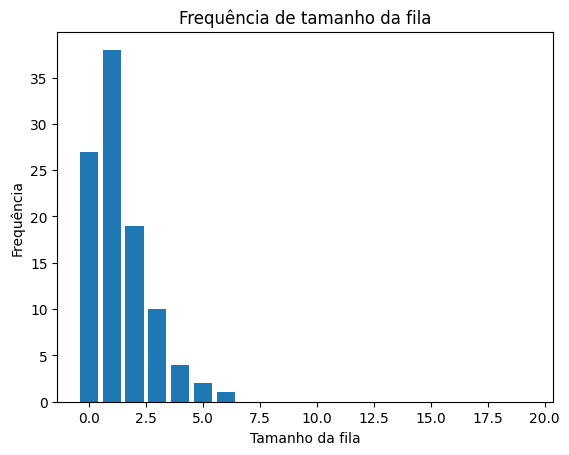

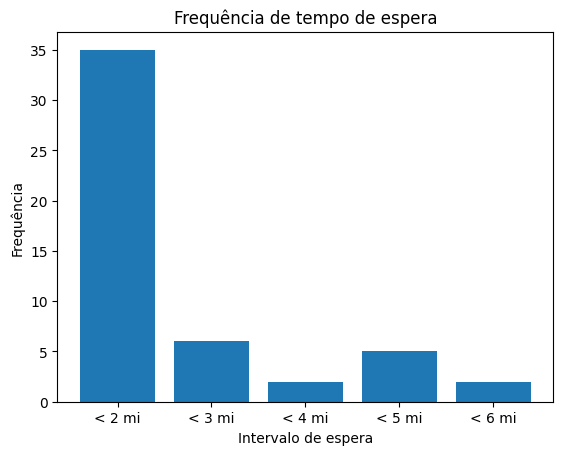

In [3]:
simulador1(100, 1, 2)

In [ ]:
simulador2(1000000, 1, 2)

In [ ]:
simulador1(1000000, 2, 4)

In [ ]:
simulador2(1000000, 2, 4)

In [ ]:
simulador1(1000000, 1, 4)

In [ ]:
simulador2(1000000, 1, 4)

In [ ]:
detsimulador1(1000, 1, 2)

In [ ]:
detsimulador2(1000000, 1, 2)